<a href="https://colab.research.google.com/github/Aseelfawaz/ASEEL57/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**







#Step 1 : import libraries

In [2]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [10]:
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [41]:
from sklearn.model_selection import train_test_split

# get the locations
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 30)
(114, 30)
(455,)
(114,)


#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)
print('Scaled training set shape:', X_train_scaled.shape)
print('Scaled test set shape:', X_test_scaled.shape)

Scaled training set shape: (455, 30)
Scaled test set shape: (114, 30)


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


df_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_pca.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2
0,4.231456,9.008845
1,9.039974,0.565203
2,-2.312008,3.241260
3,-2.539101,0.742171
4,-2.367798,2.762119


#Step 6: Fitting Logistic Regression To the training set




In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_pca, y_train)

y_train_pred = model.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_train_pred)
print('Training set accuracy:', accuracy)

Training set accuracy: 0.945054945054945


#Step 7: Predicting the test set result




In [48]:
y_test_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_test_pred)
print('Test set accuracy:', accuracy)

Test set accuracy: 0.9912280701754386


#Step 8: Making the confusion matrix




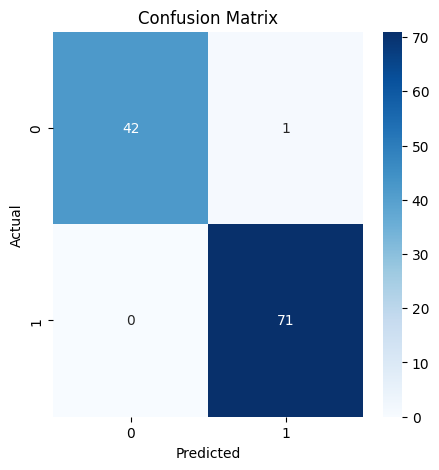

[[42  1]
 [ 0 71]]


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

#Step 9: Predicting the training set result




In [53]:
y_train_pred = model.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_train_pred)
print('Training set accuracy:', accuracy)
report = classification_report(y_train, y_train_pred)
print(report)

Training set accuracy: 0.945054945054945
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       169
           1       0.95      0.97      0.96       286

    accuracy                           0.95       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.95      0.94       455



#Step 10: Visualizing the Test set results




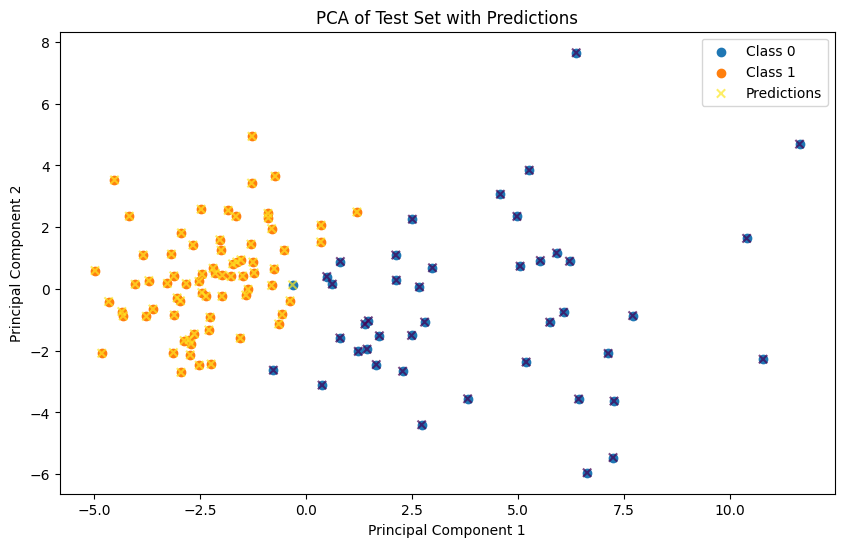

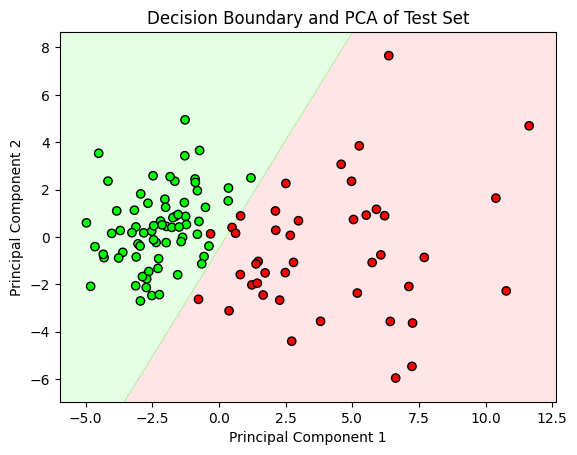

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot each class
classes = np.unique(y_test)
for class_label in classes:
    plt.scatter(
        X_test_pca[y_test == class_label, 0],
        X_test_pca[y_test == class_label, 1],
        label=f'Class {class_label}'
    )

# Highlight predictions
plt.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    c=y_test_pred,
    marker='x',
    alpha=0.7,
    label='Predictions'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Test Set with Predictions')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary and PCA of Test Set')
plt.show()

#**Well Done :)**
Now let's practice!